### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [10]:
nullColumnSeries = data.isnull().sum()
print(nullColumnSeries.sort_values())

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


<class 'pandas.core.series.Series'>
Index: 26 entries, destination to Y
Series name: None
Non-Null Count  Dtype
--------------  -----
26 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


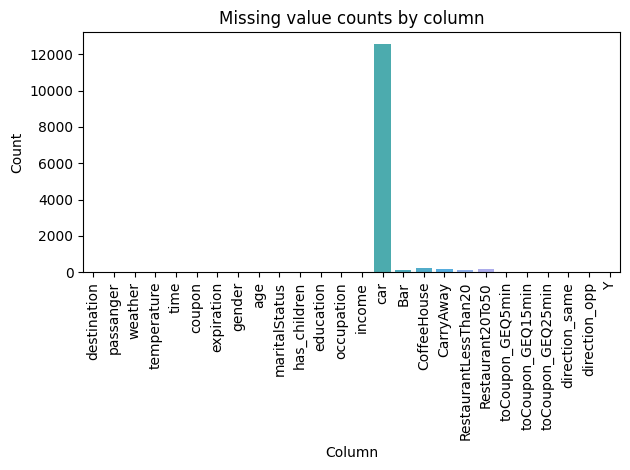

In [11]:
nullColumnSeries = data.isnull().sum()
nullColumnSeries.info()
# sns.heatmap(data.isnull(), cbar=False) # A way to visualize missing pieces of data
title = 'Missing value counts by column'
xLabel = 'Column'
yLabel = 'Count'
sns.barplot(x = nullColumnSeries.index, y = nullColumnSeries.values).set_title(title)
plt.xlabel(xLabel)
plt.ylabel(yLabel)
plt.xticks(rotation=90) 
plt.tight_layout()


In [12]:
nullColumnSeries = data.isnull().sum()
print(nullColumnSeries.info())
print(nullColumnSeries)
# Plotly is a little better because it's interactive easier to see actual numbers on hover
title = 'Missing value counts by column'
xLabel = 'Column'
yLabel = 'Count'
fig = px.bar(nullColumnSeries, x=nullColumnSeries.index, y=nullColumnSeries.iloc[1], title=title, labels={'index': xLabel, '0': yLabel})
fig.show()

<class 'pandas.core.series.Series'>
Index: 26 entries, destination to Y
Series name: None
Non-Null Count  Dtype
--------------  -----
26 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB
None
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


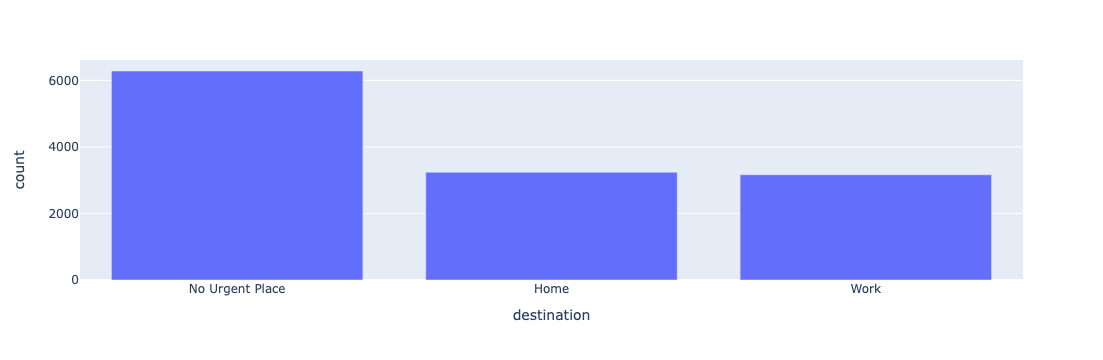

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


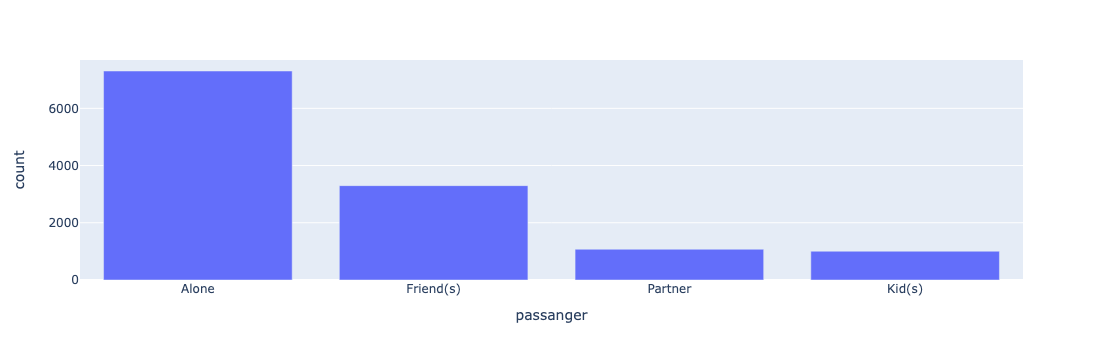

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


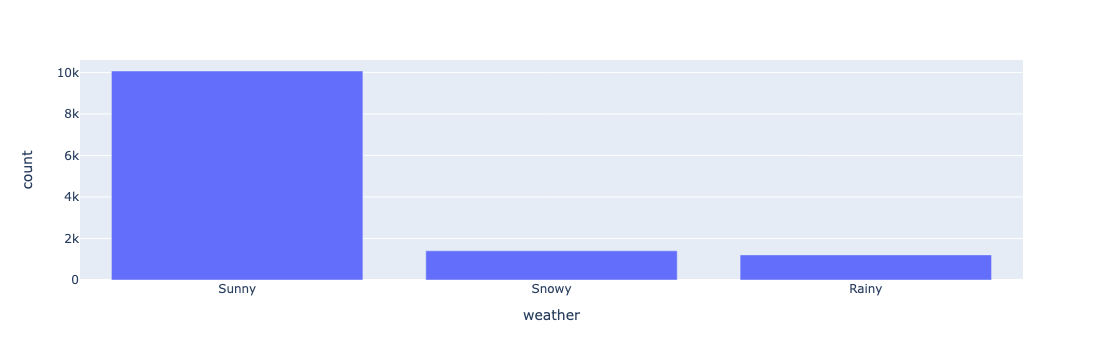

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


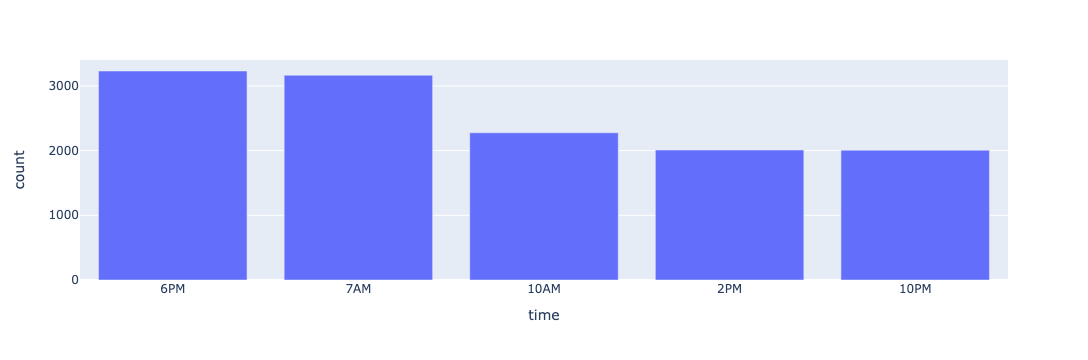

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


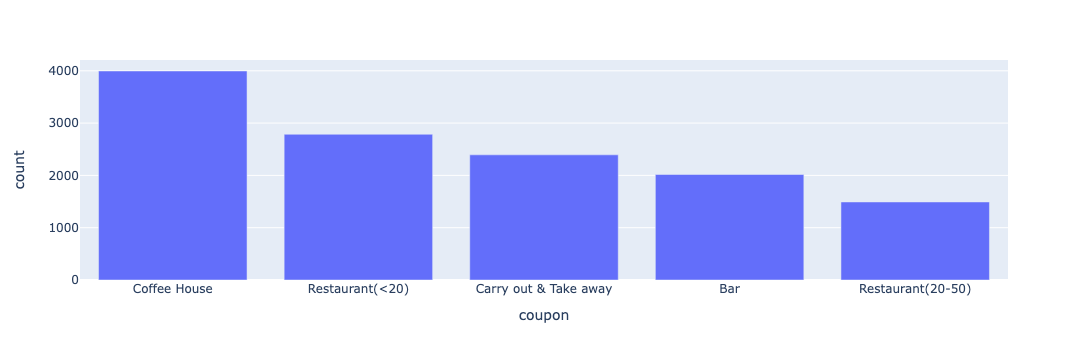

expiration
1d    7091
2h    5593
Name: count, dtype: int64


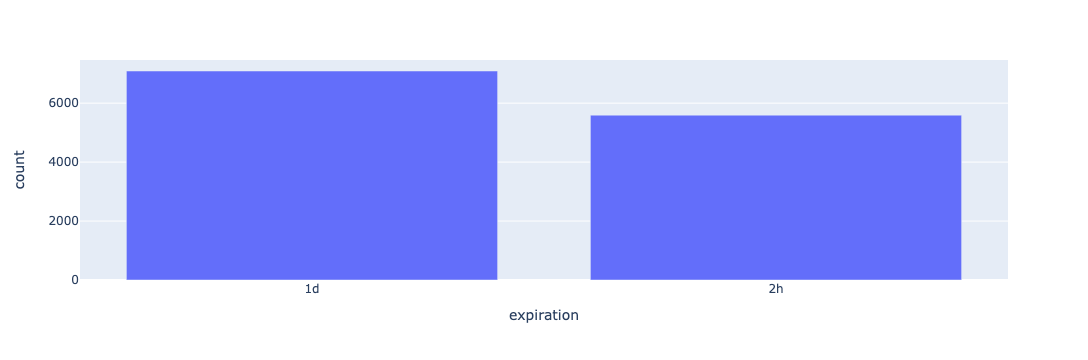

gender
Female    6511
Male      6173
Name: count, dtype: int64


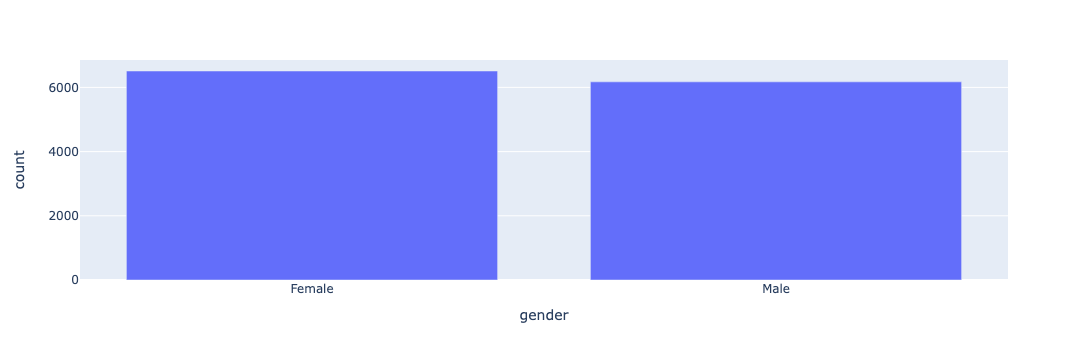

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64


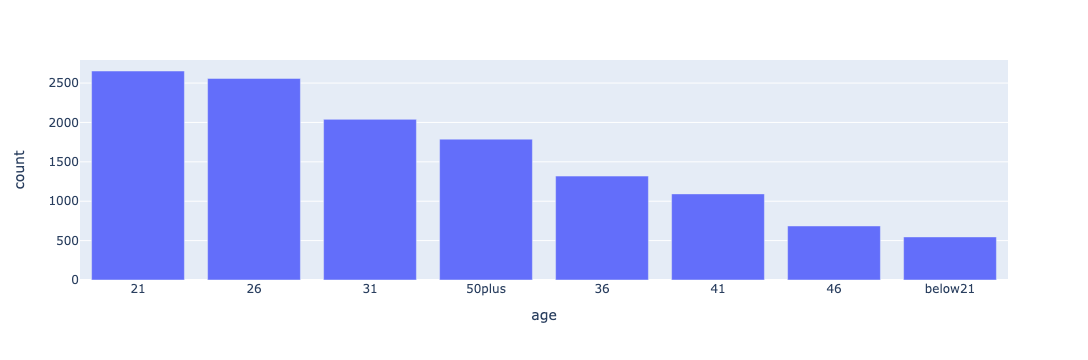

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64


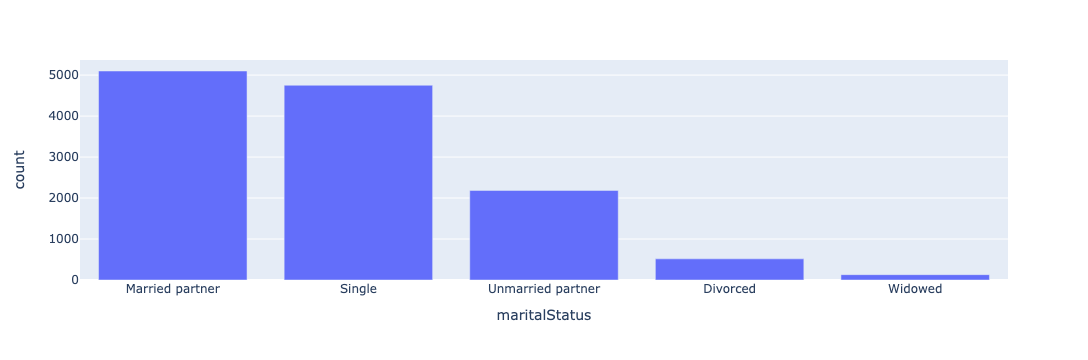

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64


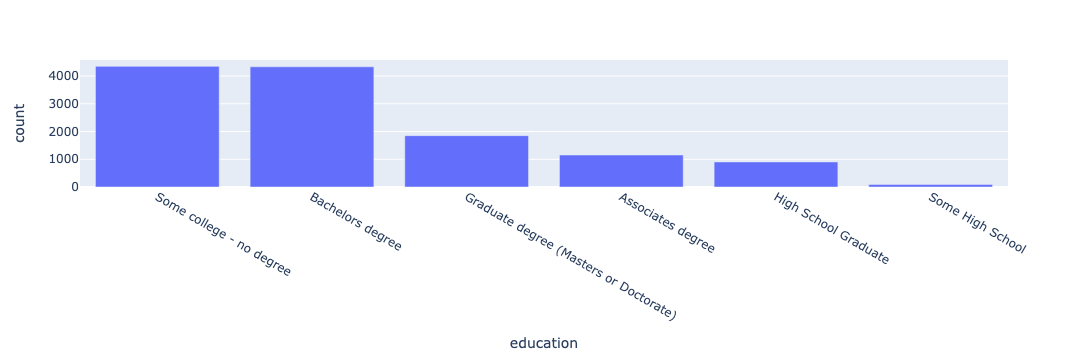

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

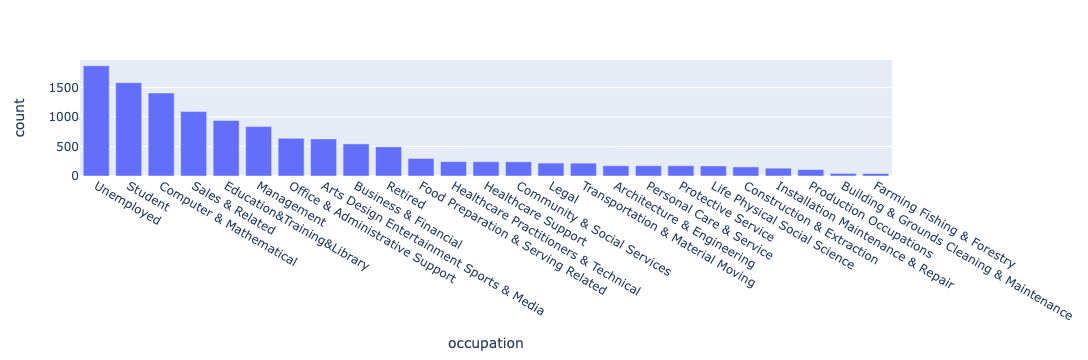

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64
car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


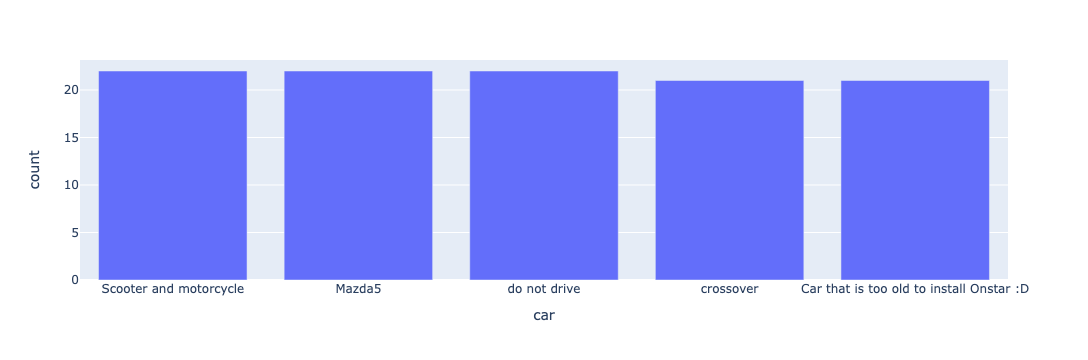

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


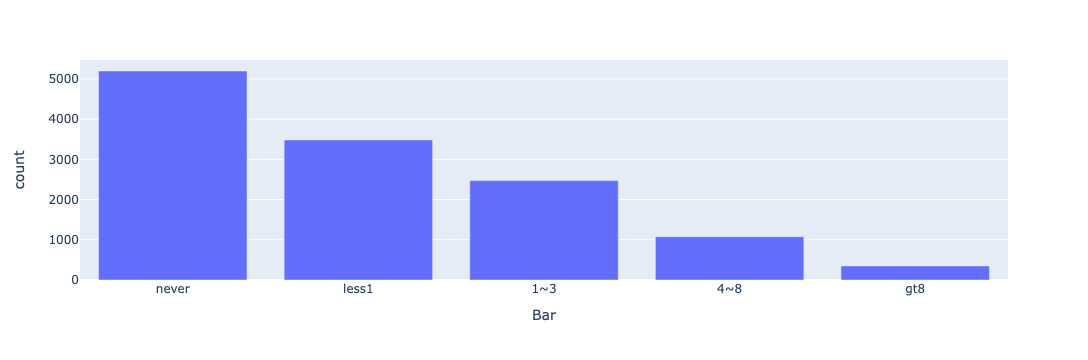

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


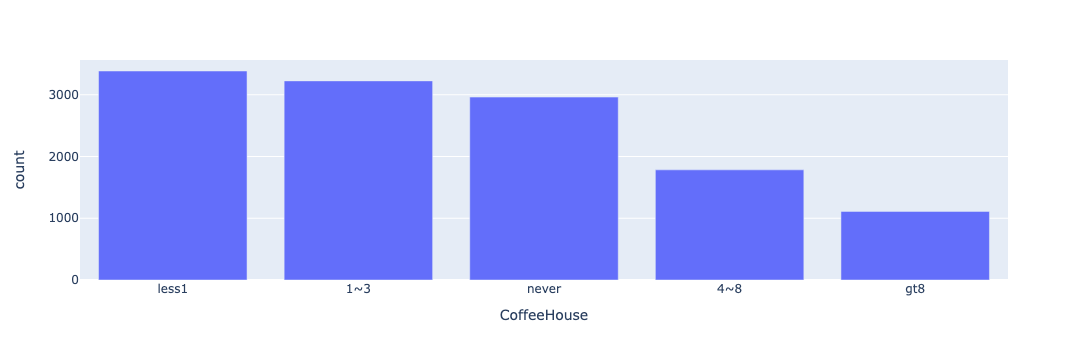

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


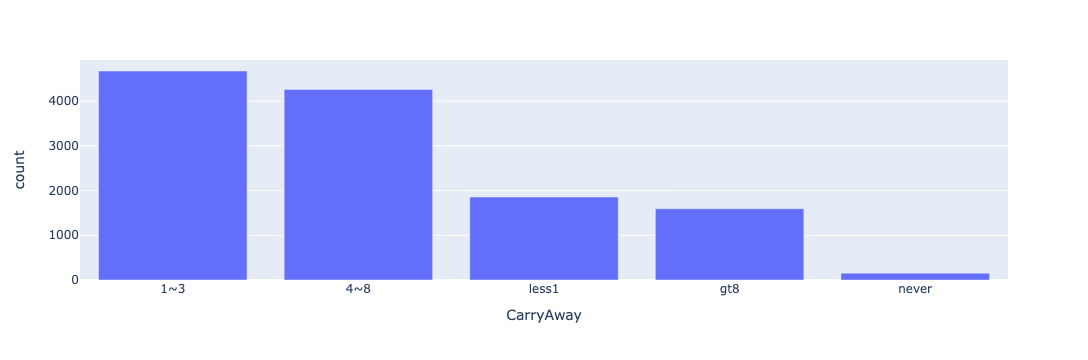

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


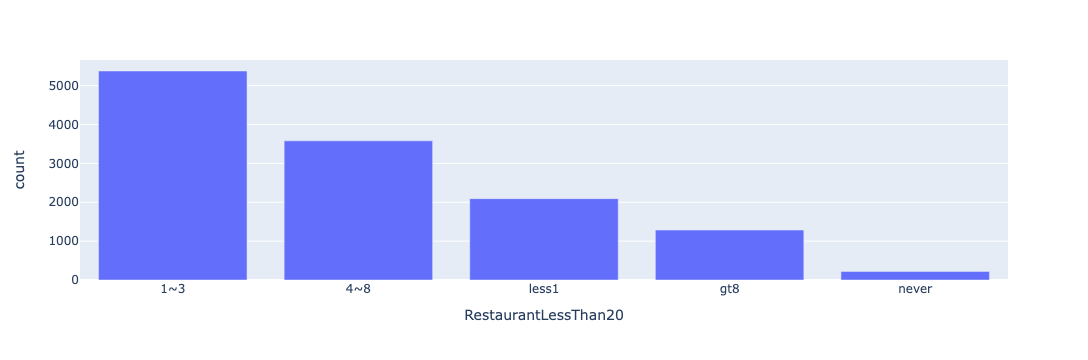

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


In [13]:
# Grab all the object columns and check out the values to check for cleanup
testColumns = list(data.select_dtypes(['object']).columns)
for k in testColumns:
    columDf = data[k].value_counts().reset_index();
    print(data[k].value_counts())
    if k != 'income': #Plotly is throwing an error for this for some reason.
        fig = px.bar(columDf, x=k, y='count')
        fig.show()

3. Decide what to do about your missing data -- drop, replace, other...

<table>
    <tr>
        <th>Column</th>
        <th># Missing Values</th>
        <th>Notes</th>
        <th>Plan</th>
    </tr>
    <tr>
        <td>Car</td>
        <td>12576</td>
        <td>Missing a lot of values and the ones that are there don't seem to be that useful</td>
        <td>Ignore column for anlaysis</td>
    </tr>
    <tr>
        <td>CoffeeHouse</td>
        <td>217</td>
        <td>Missing Data</td>
        <td>Remove rows where this column is empty</td>
    </tr>  
    <tr>
        <td>Restaurant20To50</td>
        <td>189</td>
        <td>Missing Data</td>
        <td>Remove rows where this column is empty</td>
    </tr>  
    <tr>
        <td>CarryAway</td>
        <td>151</td>
        <td>Missing Data</td>
        <td>Remove rows where this column is empty</td>
    </tr>    
    <tr>
        <td>RestaurantLessThan20</td>
        <td>130</td>
        <td>Missing Data</td>
        <td>Remove rows where this column is empty</td>
    </tr>
    <tr>
        <td>Bar</td>
        <td>107</td>
        <td>Missing Data</td>
        <td>Remove rows where this column is empty</td>
    </tr>
    <tr>
        <td>age, time, income</td>
        <td>0</td>
        <td>Data not amenable to correlation</td>
        <td>Create new field</td>
    </tr>  
    <tr>
        <td>Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 </td>
        <td>0</td>
        <td>Data not amenable to correlation</td>
        <td>Create new field</td>
    </tr>
    <tr>
        <td>toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp</td>
        <td>0</td>
        <td>Data not amenable to correlation or group by graphing</td>
        <td>Create new field/s</td>
    </tr>
</table>
<p>Based on the calculation below I am ok with dropping all the empty rows from the dataset:
    <ul>
    <li>Dropped Rows: 605</li>
    <li>Ignored Data %: 4.769788710186061</li>
    </ul>
</p>


In [16]:
# Being selective in case I change my mind later easier way would be to use dropna
# filter = 'CoffeeHouse.notnull() & Restaurant20To50.notnull() & CarryAway.notnull() & RestaurantLessThan20.notnull() & Bar.notnull()'
# cleanedDf = data.query(filter)
# Commonly used functions
COLOR_MAP_YES_NO = {'Yes': 'green', 'No': 'red'}
debugOn = False
BASE_LABELS = {
    'accepted': 'Accepted',
    'percent': 'Percentage',
    'destination': 'Driving destination',
    'passanger': 'Passenger',
    'weather': 'Weather',
    'temperature': 'Temperature',
    'time': 'Time of day',
    'coupon': 'Coupon Type',
    'expiration': 'Time before coupon expiration',
    'gender': 'Gender',
    'age': 'Age',
    'maritalStatus': 'Marital Status',
    'has_children': '# Children',
    'education': 'Education',
    'occupation': 'Occupation',
    'income': 'Income',
    'Bar': '# Bar visits per month',
    'CoffeeHouse': '# Coffee House visits per month',
    'CarryAway': '# Takeout per month',
    'RestaurantLessThan20': '# Restaurant Visits per month ( $0 < spend < $20 / person)',
    'Restaurant20To50': '# Restaurant Visits per month ( $20 <= spend < $50 / person)',
    'toCoupon_GEQ5min': 'Time to venue >= 5 min',
    'toCoupon_GEQ15min': 'Time to venue >= 15 min',
    'toCoupon_GEQ25min': 'Time to venue >= 25 min',
    'direction_same': 'Travel direction same as venue',
    'direction_opp': 'Travel direction opposite as venue',
    'const_1': 'All'
}
STRING2NUM_CONVERSION_MAP = {
    '50plus': 51,
    'below21': 20,
    'less1': 0.5,
    '1~3': 1,
    'never': 0,
    '4~8': 4,
    'gt8': 9
}
def convertAccepted(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

def convertAge(x):
    if x in STRING2NUM_CONVERSION_MAP:
        return STRING2NUM_CONVERSION_MAP[x]
    else:
        return int(x)

def convertTime(x):
    numberComponent = int(x[0:-2])
    indexOfPM = x.find('PM')
    if indexOfPM >= 0:
        return numberComponent + 12
    elif numberComponent == 12: # Check 12 am case
        return 0
    else:
        return numberComponent


def convertIncome(x):
    indexOfDash = x.find(' -')
    isRange = x[0] == '$'
    if indexOfDash > 0:
        numberComponent = int(x[1:indexOfDash])
        return numberComponent
    else:
        if x.find('More') > 0:
            return 100000
        else:
            return 12499
            
def convertTravelDirection(x):
    if x == 1:
        return 'same'
    else:
        return 'opposite'

def convertDistance(toCoupon_GEQ25min, toCoupon_GEQ15min, toCoupon_GEQ5min):
    val = '>= 5min'
    if toCoupon_GEQ25min == 1:
        val = '>= 25min'
    elif toCoupon_GEQ15min == 1:
        val = '>= 15min'
    return val

def convertOther(x):
    if x in STRING2NUM_CONVERSION_MAP:
        return STRING2NUM_CONVERSION_MAP[x]
    raise Exception(str(x) + ' unhandled case')


def convertCoupon(x):
    indexOfRestaurant = x.find('Restaurant')
    if indexOfRestaurant >= 0:
        return 'Restaurant'
    else:
        return x

# Can take a correlation matrix and output x, y, val columns to make graphing for other types easier
def df4correlation(input, xLabel, yLabel, valueLabel):
    out = input.stack().reset_index()
    out.columns = [xLabel, yLabel, valueLabel]
    return out

# Try out a single or dual features and output experiments in single graph
def plotHeatMapPair(df2Use, pairs2Try, saveFile):
    rows = len(pairs2Try)
    cols= 1
    i=0
    
    # Setup Figure
    fig, axs = plt.subplots(rows, cols, squeeze=False, figsize=(24,100) )
    plt.subplots_adjust(hspace = 0.8, wspace= 0.8)
    
    for pair in pairs2Try:
        xKey = pair[0]
        yKey = pair[1]
        aggKey = 'Y'
        labels = BASE_LABELS.copy()
        labels['const_1'] = ''
        # Getting the mean of Y is the same as calculating percent yes
        corrDf = pd.crosstab(df2Use[xKey], 
                             df2Use[yKey], 
                             values=df2Use[aggKey], 
                             aggfunc='mean', 
                             dropna=False)
        # Plot
        ax = sns.heatmap(corrDf, 
                         annot=True, 
                         ax=axs[i, 0], 
                         center=0.5,
                         vmax=1,
                         vmin=0,
                         cmap=sns.color_palette("coolwarm", as_cmap=True))
        xLabel = labels[xKey]
        yLabel = labels[yKey]
        xLabelPrefix = xLabel
        if xLabelPrefix != '':
            xLabelPrefix = xLabelPrefix + ' vs '
        title = 'Percentage Accepted for ' + xLabelPrefix + yLabel
        ax.set(xlabel=yLabel, ylabel=xLabel, title=title)
        #ax.tick_params(axis='x', rotation=30)
        #increment plot locations
        i=i+1
        # test = experimentDf.groupby([xKey, yKey, 'accepted'])['Y'].count().reset_index()
        # print(test)
    if saveFile != None:
        fig.savefig(saveFile)
        
def generateAcceptanceRateHistogramReport4Column(params, df2Use, groupByColumn, fileName):
    colorColumn = 'accepted'

    labels = BASE_LABELS.copy()
    title = labels[colorColumn] + ' by ' + labels[groupByColumn]
    fig = px.histogram(df2Use, 
                       x=groupByColumn, 
                       color=colorColumn, 
                       nbins=50, 
                       color_discrete_map=COLOR_MAP_YES_NO, 
                       text_auto= '.0f',
                       title=title, 
                       labels=labels)
    fig.write_image(fileName)
    fig.show()

def generateAcceptanceRateBarReport4Column(params, df2Use, groupByColumn, fileName):
    normalizedColumn = 'percent'
    countColumn = 'Y'
    colorColumn = 'accepted'

    debug = False
    if params != None:
        if 'debug' in params:
            debug = params['debug']
    
    baseDf = df2Use.copy()
    currDf = df2Use.groupby([groupByColumn, colorColumn])[countColumn].count().reset_index()
    denomDf = df2Use.groupby([groupByColumn])[countColumn].count().reset_index()
    #print(denomDf.info())
    #print(denomDf)
    currDf = currDf.merge(denomDf, how='inner', on=groupByColumn)
    currDf[normalizedColumn] = 100 * currDf[countColumn + '_x'] / currDf[countColumn + '_y']
    #print(currDf.info())
    if debug:
        print(currDf)

    labels = BASE_LABELS.copy()
    title = labels[normalizedColumn] + ' ' + labels[colorColumn] + ' by ' + labels[groupByColumn]
    fig = px.bar(currDf, 
                 x=groupByColumn, 
                 y=normalizedColumn, 
                 color=colorColumn, 
                 color_discrete_map=COLOR_MAP_YES_NO, 
                 barmode='stack', 
                 text_auto= '.2f',
                 title=title, 
                 labels=labels)
    fig.write_image(fileName)
    fig.show()

def generateAcceptanceRateBarReport4Criteria(params, df2Use, conditions, saveFile):
    baseDf = df2Use.copy()
    countColumn = 'Y'
    colorColumn = 'accepted'
    groupByColumn = 'criteria'
    normalizedColumn = 'percent'
    colorColumnValues = baseDf[colorColumn].value_counts()

    debug = False
    xAxisLabel = 'Criteria'
    if params != None:
        if 'debug' in params:
            debug = params['debug']
        if 'xAxisLabel' in params:
            xAxisLabel = params['xAxisLabel']
    
    aggReportingDf = pd.DataFrame(columns=['criteriaX', 'name', colorColumn, 'count', 'total', 'percent', 'query'])
    for ck in conditions:
        annotationText = ''
        displayValue = ck['xAxisDisplay']
        name = ck['name']
        currCondition = ck['condition']
        totalCount = baseDf.query(currCondition)['const_1'].count()
        annotationText = annotationText + '<b>' + displayValue + '</b>: '  + name + '<br>'
        for cck in colorColumnValues.index:
            subCondition = '(' + currCondition + ') and ' + colorColumn + ' == "' +  cck + '"' # Probably need better handling for types
            currCount = baseDf.query(subCondition)['const_1'].count()
            node = {
                'criteriaX': displayValue,
                colorColumn: cck,
                'name': name,
                'count': currCount,
                'total': totalCount,
                'percent': 100 * currCount / totalCount,
                'query': subCondition
            }
            aggReportingDf.loc[len(aggReportingDf)] = node
            
        labels = BASE_LABELS.copy()
        labels['criteria'] = xAxisLabel
        labels['criteriaX'] = xAxisLabel
        #labels['criteriaX'] = 'Criteria<br>' + annotationText
        title = labels[normalizedColumn] + ' ' + labels[colorColumn] + ' by ' + labels[groupByColumn]+ '</sup>'
        # For some reason plotly is throwing an error on this dataset when I have large labels so working around that

    if debug:
        print(aggReportingDf)

    fig = px.bar(aggReportingDf, 
                 x='criteriaX', 
                 y=normalizedColumn, 
                 color=colorColumn, 
                 color_discrete_map=COLOR_MAP_YES_NO, 
                 barmode='stack', 
                 text_auto= '.2f',
                 title=title, 
                 labels=labels)
    
    if saveFile != None and saveFile != '':
        fig.write_image(saveFile)
    fig.show()

    fig = go.Figure(data=[
                    go.Table(
                        header=dict(values=list(aggReportingDf.columns),
                        fill_color='paleturquoise',
                        align='left'),
                        cells=dict(values=[aggReportingDf['criteriaX'], aggReportingDf['name'], aggReportingDf[colorColumn], aggReportingDf['count'], aggReportingDf['total'], aggReportingDf['percent'], aggReportingDf['query']],
                           fill_color='lavender',
                           align='left'))])
    if saveFile != None and saveFile != '':
        tableFile = saveFile[:-3] + 'table.png'
        fig.write_image(tableFile)
    fig.show()

data['accepted'] = data['Y'].apply(convertAccepted)
# Drop the null column fields
cleanedDf = data.dropna(subset=['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'])
# Drop car
cleanedDf = cleanedDf.drop(columns=['car'])
# Create const field for other operations
cleanedDf['const_1'] = 1
# Start cleanup and remap for correlation fields
cleanedDf['age_numeric'] = cleanedDf['age'].apply(convertAge)
BASE_LABELS['age_numeric'] = BASE_LABELS['age']
cleanedDf['time_numeric'] = cleanedDf['time'].apply(convertTime)
BASE_LABELS['time_numeric'] = BASE_LABELS['time']
cleanedDf['income_numeric'] = cleanedDf['income'].apply(convertIncome)
BASE_LABELS['income_numeric'] = BASE_LABELS['income']
cleanedDf['income_numeric'] = cleanedDf['income'].apply(convertIncome)
BASE_LABELS['coupon_normalized'] = BASE_LABELS['coupon']
cleanedDf['coupon_normalized'] = cleanedDf['coupon'].apply(convertCoupon)
BASE_LABELS['venue_direction'] = 'Direction of venue'
cleanedDf['venue_direction'] = cleanedDf['direction_same'].apply(convertTravelDirection)
BASE_LABELS['venue_travel_time'] = 'Travel time to venue'
cleanedDf['venue_travel_time'] = cleanedDf.apply(lambda row: convertDistance(row['toCoupon_GEQ25min'],
                                         row['toCoupon_GEQ15min'], row['toCoupon_GEQ5min']), axis=1)
otherNumericFieldsToConvert = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for k in otherNumericFieldsToConvert:
    # Treat the less1 and never values as 0
    newKey = k + '_numeric'
    cleanedDf[k + '_numeric'] = cleanedDf[k].apply(convertOther)
    BASE_LABELS[newKey] = BASE_LABELS[k]

cleanedDf.info()

# Print cleanup results
droppedRows = data.shape[0] - cleanedDf.shape[0]
print('Dropped Rows: ' + str(droppedRows))
print('Ignored Data %: ' + str(droppedRows*100/data.shape[0]))
# Get columns of type
NUMERIC_COLUMNS = cleanedDf.select_dtypes(include=np.number).columns.tolist()
CATEGORY_COLUMNS = list(cleanedDf.select_dtypes(['object']).columns)
print('Numeric Columns:' + str(NUMERIC_COLUMNS))
print('Category Columns:' + str(CATEGORY_COLUMNS))
# print('Labels:' + str(BASE_LABELS))



<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   destination                   12079 non-null  object 
 1   passanger                     12079 non-null  object 
 2   weather                       12079 non-null  object 
 3   temperature                   12079 non-null  int64  
 4   time                          12079 non-null  object 
 5   coupon                        12079 non-null  object 
 6   expiration                    12079 non-null  object 
 7   gender                        12079 non-null  object 
 8   age                           12079 non-null  object 
 9   maritalStatus                 12079 non-null  object 
 10  has_children                  12079 non-null  int64  
 11  education                     12079 non-null  object 
 12  occupation                    12079 non-null  object 
 13  incom

4. What proportion of the total observations chose to accept the coupon? 

<b>Answer:</b> Based on the analysis below 56.93% of total observations chose to accept the coupon

          criteriaX              name accepted  count  total    percent  \
0  All observations  All observations      Yes   6877  12079  56.933521   
1  All observations  All observations       No   5202  12079  43.066479   

                                  query  
0  (const_1 == 1) and accepted == "Yes"  
1   (const_1 == 1) and accepted == "No"  


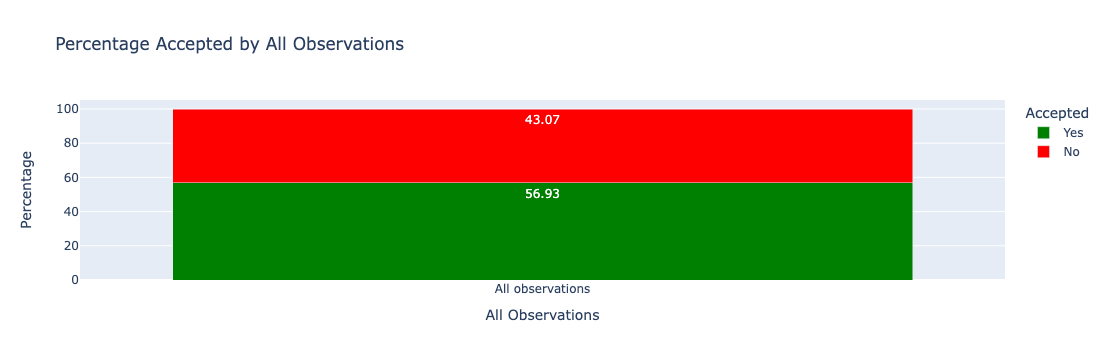

In [19]:
condition = {
    'name': 'All observations',
    'condition': 'const_1 == 1',
    'xAxisDisplay': 'All observations'
}
params = {'debug': True, 'xAxisLabel': 'All Observations'}
generateAcceptanceRateBarReport4Criteria(params, cleanedDf, [condition],  './images/answer4.png')

5. Use a bar plot to visualize the `coupon` column.

<b>Answer:</b> Based on the analysis below Carry out & Take away (73.77%) and Restaurant(<20) (70.90%) have fairly high acceptance rates on the coupons

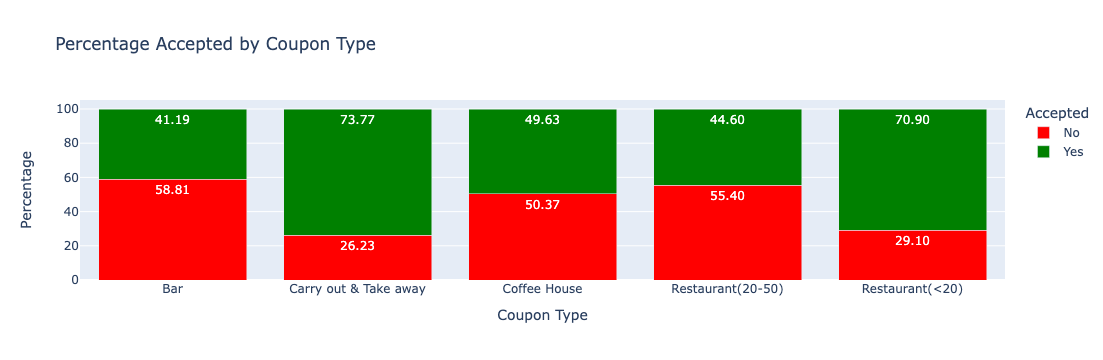

In [22]:
params = {'debug': debugOn}
generateAcceptanceRateBarReport4Column(params, cleanedDf, 'coupon', './images/answer5.png')

6. Use a histogram to visualize the temperature column.

<b>Answer:</b> Based on the analysis below as temperature increases there might be some correlation in acceptance rate but more analysis is needed as this feature isn't granular enough. There are wide gaps in the temperature as well.

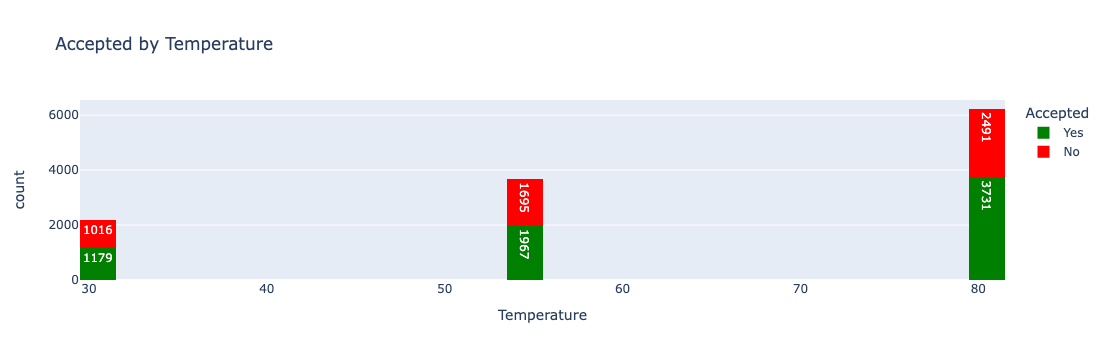

In [25]:
params = {'debug': True}
generateAcceptanceRateHistogramReport4Column(params, cleanedDf, 'temperature', './images/answer6.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [27]:
BAR_COUPONS_DF = cleanedDf.query('coupon == "Bar"')
BAR_COUPONS_DF

destination  passanger weather  temperature  time coupon  \
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
46     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
57                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration gender age maritalStatus  ...  time_numeric income_numeric  \
24            1d   Male  21        Single  ...            10          62500   
35            1d   Male  21        Single  ...            18          62500   
39            1d   Male  21        Single  ...             7          62500   
46            1d   Male  46        Single  ...            10          12500   
57            1d   Male  46        Single  ...            18          12500   
...          ...    ...  ..           ...  ...           ...            ...   
12663         1d   Male  26        Single  ...            22          75000   
12664         2h   Male  26        Single  ...            22          75000   
12667         1d   Male  26        Single  ...            10          75000   
12670         2h   Male  26        Single  ...            18          75000   
12682         1d   Male  26        Single  ...             7          75000   

      coupon_normalized venue_direction venue_travel_time Bar_numeric  \
24                  Bar        opposite           >= 5min         0.0   
35                  Bar            same           >= 5min         0.0   
39                  Bar        opposite          >= 25min         0.0   
46                  Bar        opposite           >= 5min         0.0   
57                  Bar            same           >= 5min         0.0   
...                 ...             ...               ...         ...   
12663               Bar        opposite          >= 15min         0.0   
12664               Bar        opposite          >= 15min         0.0   
12667               Bar        opposite          >= 15min         0.0   
12670               Bar        opposite          >= 15min         0.0   
12682               Bar        opposite          >= 25min         0.0   

      CoffeeHouse_numeric CarryAway_numeric RestaurantLessThan20_numeric  \
24                    0.5               4.0                          4.0   
35                    0.5               4.0                          4.0   
39                    0.5               4.0                          4.0   
46                    4.0               1.0                          1.0   
57                    4.0               1.0                          1.0   
...                   ...               ...                          ...   
12663                 0.0               1.0                          4.0   
12664                 0.0               1.0                          4.0   
12667                 0.0               1.0                          4.0   
12670                 0.0               1.0                          4.0   
12682                 0.0               1.0                          4.0   

       Restaurant20To50_numeric  
24                          0.5  
35                          0.5  
39                          0.5  
46                          0.0  
57                          0.0  
...                         ...  
12663                       1.0  
12664                       1.0  
12667                       1.0  
12670                       1.0  
12682                       1.0  

[1913 rows

2. What proportion of bar coupons were accepted?

<b>Answer:</b> Based on the analysis below 41.19% of Bar coupons were accepted

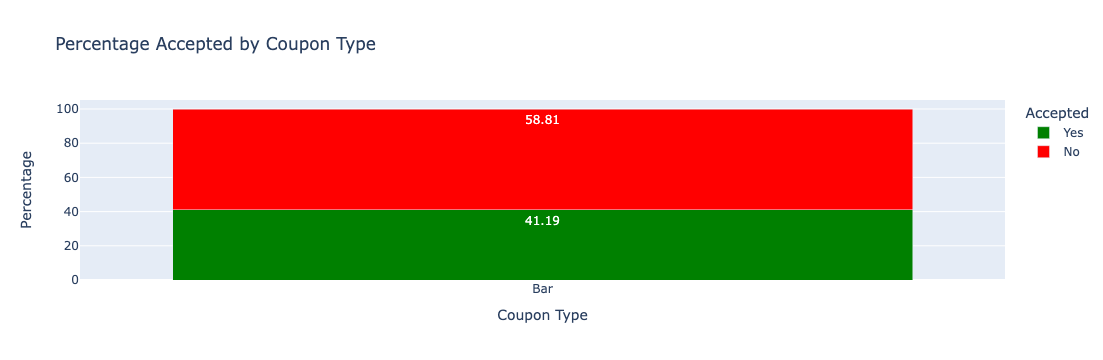

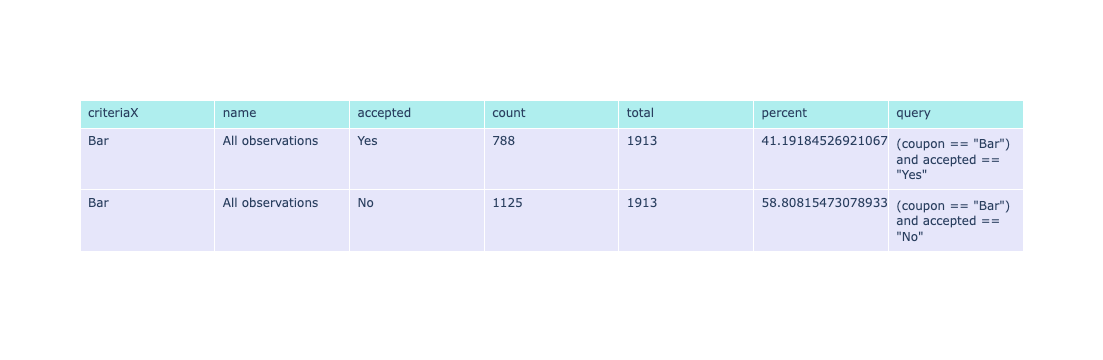

In [30]:
condition = {
    'name': 'All observations',
    'condition': 'coupon == "Bar"',
    'xAxisDisplay': 'Bar'
}
params = {'debug': debugOn, 'xAxisLabel': 'Coupon Type'}
generateAcceptanceRateBarReport4Criteria(params, cleanedDf, [condition], './images/bar_answer2.png')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<b>Answer:</b> Based on the analysis below Bar coupons were accepted at approximately double the rate for people who attended a bar more than 3 times a month (76.17%) vs those that went 3 or fewer times a month (37.27%)

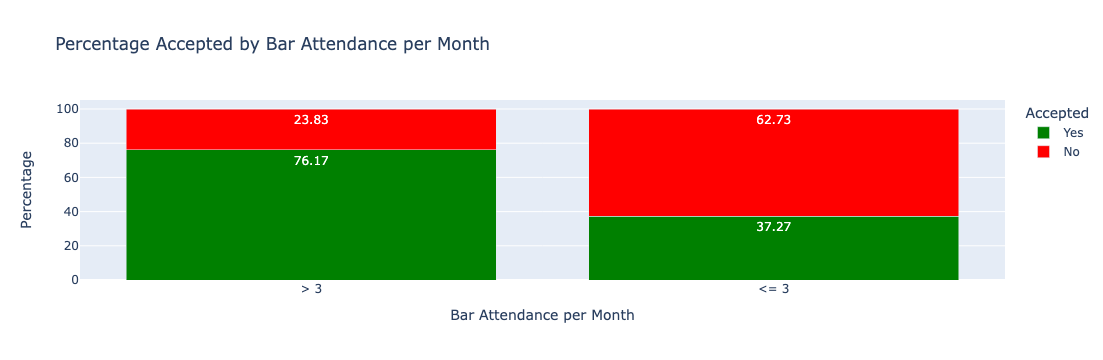

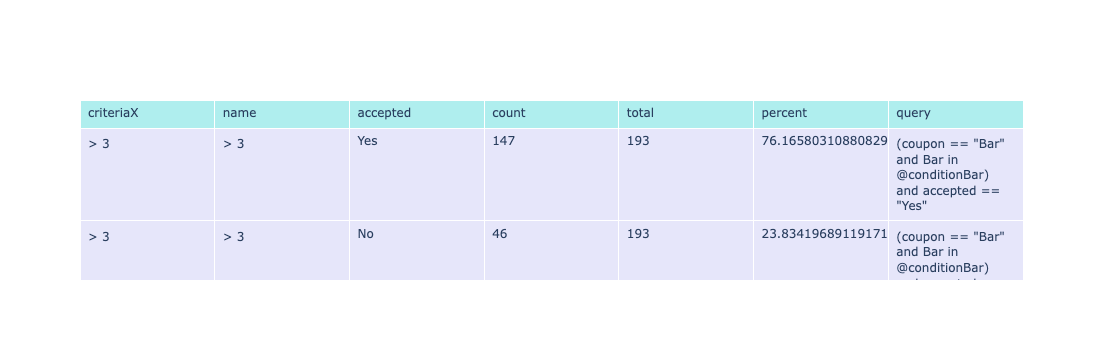

In [33]:
conditionBar = ['4~8', 'gt8']
condition1 = {
    'name': '> 3',
    'condition': 'coupon == "Bar" and Bar in @conditionBar',
    'xAxisDisplay': '> 3'
}
condition2 = {
    'name': '<= 3',
    'condition': 'coupon == "Bar" and Bar not in @conditionBar',
    'xAxisDisplay': '<= 3'
}
params = {'debug': debugOn, 'xAxisLabel': 'Bar Attendance per Month'}
generateAcceptanceRateBarReport4Criteria(params, cleanedDf, [condition1, condition2], './images/bar_answer3.png')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<b>Answer:</b> Based on the analysis below Bar coupons were accepted at approximately double the rate for people who were 25 and over and attended a bar more than once a month (68.98%) vs others (33.77%)

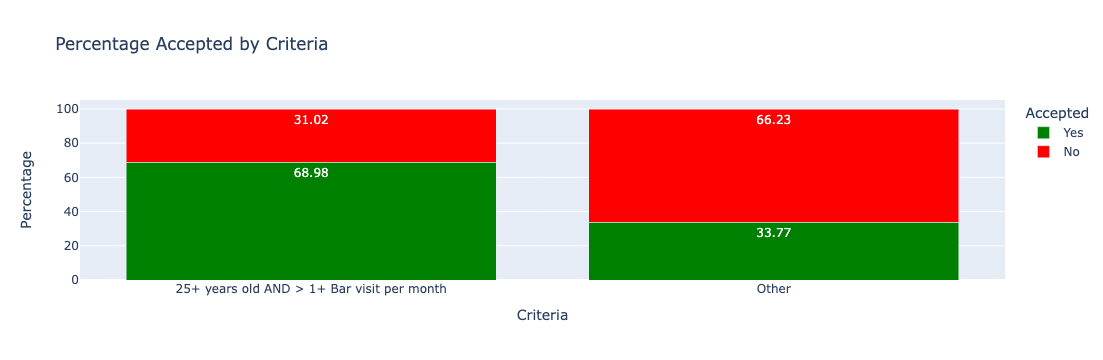

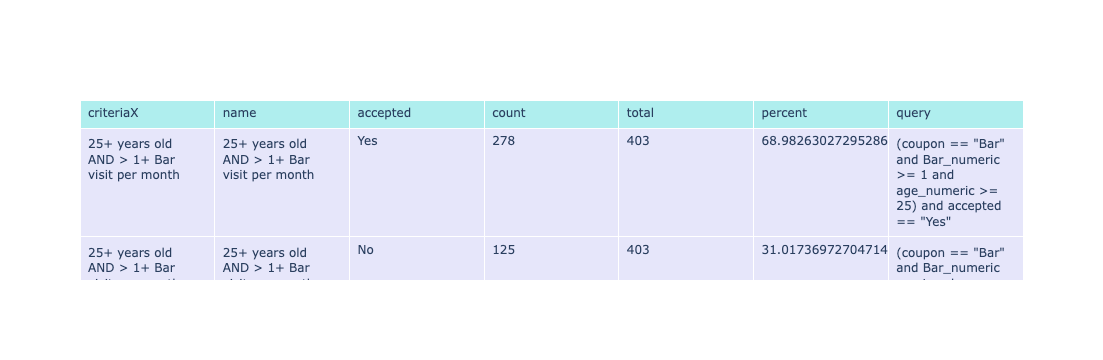

In [36]:
conditionBar = ['4~8', 'gt8']
condition1 = {
    'name': '25+ years old AND > 1+ Bar visit per month',
    'condition': 'coupon == "Bar" and Bar_numeric >= 1 and age_numeric >= 25',
    'xAxisDisplay': '25+ years old AND > 1+ Bar visit per month'
}
condition2 = {
    'name': 'Other',
    'condition': 'coupon == "Bar" and not (Bar_numeric >= 1 and age_numeric >= 25)',
    'xAxisDisplay': 'Other'
}
params = {'debug': debugOn, 'xAxisLabel': 'Criteria'}
generateAcceptanceRateBarReport4Criteria(params, cleanedDf, [condition1, condition2], './images/bar_answer4.png')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<b>Answer:</b>Based on the analysis below Bar coupons were accepted at close to double rate for people go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry (70.94%) vs others (29.79%)

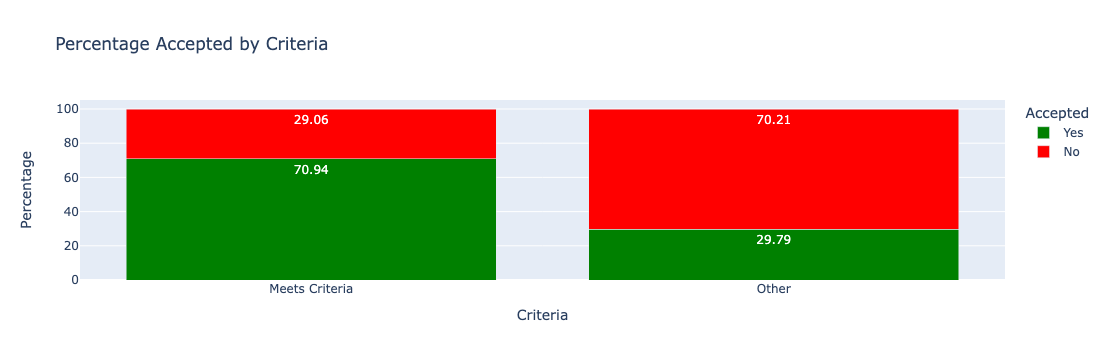

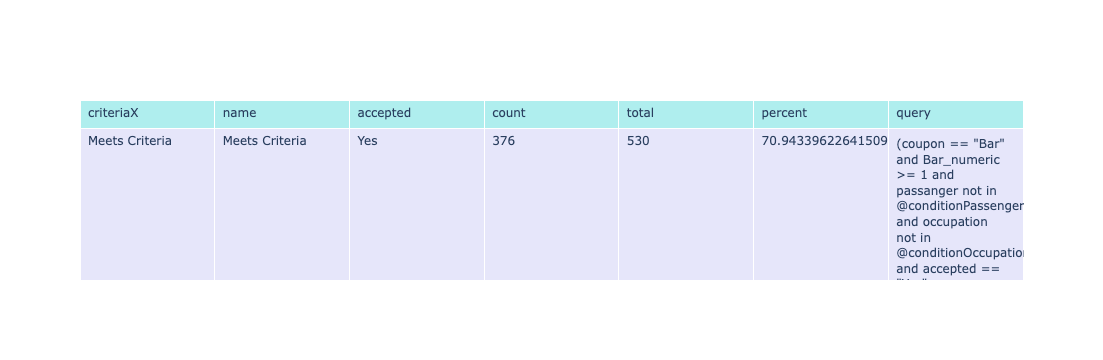

In [39]:
conditionPassenger = ['Kid(s)']
conditionOccupation = ['Farming Fishing & Forestry']
condition1 = {
    'name': 'Meets Criteria',
    'condition': 'coupon == "Bar" and Bar_numeric >= 1 and passanger not in @conditionPassenger and occupation not in @conditionOccupation',
    'xAxisDisplay': 'Meets Criteria'
}
condition2 = {
    'name': 'Other',
    'condition': 'coupon == "Bar" and not (Bar_numeric >= 1 and passanger not in @conditionPassenger and occupation not in @conditionOccupation)',
    'xAxisDisplay': 'Other'
}
additionalText = '<sup><b>Profile: </b> drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry</sup>'
params = {'debug': debugOn, 'xAxisLabel': 'Criteria', 'additionalText': additionalText}
generateAcceptanceRateBarReport4Criteria(params, cleanedDf, [condition1, condition2], './images/bar_answer5.png')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<b>Answer:</b>Based on the analysis below Bar coupons were accepted at the following rates for the criteria:<br>
<b>Assumption:</b> We are still only looking at bar coupons<br>
<ul>
    <li>go to bars more than once a month, had passengers that were not a kid, and were not widowed: 70.94%</li>
    <li>go to bars more than once a month and are under the age of 30: 71.95%</li>
    <li>go to cheap restaurants more than 4 times a month and income is less than 50K: 45.64%</li>
</ul><br>
As the question is unclear grouping those criteria together yields the following results. Acceptance was double those not matching the criteria:
<ul>
    <li>Matching ANY of those three cirteria sets: 58.71% </li>
    <li>NOT Matching ANY of those three cirteria sets: 29.99% </li>
</ul>

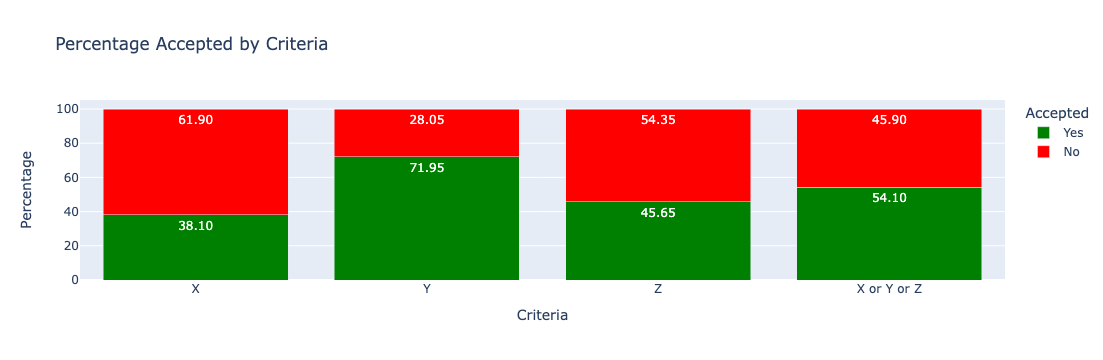

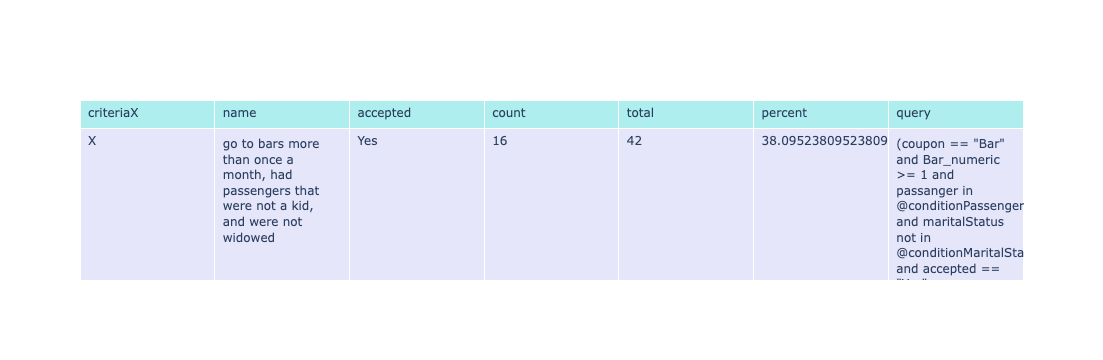

In [42]:
conditionPassenger = ['Kid(s)']
conditionMaritalStatus = ['Widowed']
condition1 = {
    'name': 'go to bars more than once a month, had passengers that were not a kid, and were not widowed',
    'condition': 'coupon == "Bar" and Bar_numeric >= 1 and passanger in @conditionPassenger and maritalStatus not in @conditionMaritalStatus',
    'xAxisDisplay': 'X'
}
condition2 = {
    'name': 'go to bars more than once a month and are under the age of 30',
    'condition': 'coupon == "Bar" and Bar_numeric >= 1 and age_numeric < 30',
    'xAxisDisplay': 'Y'
}
condition3 = {
    'name': 'go to cheap restaurants more than 4 times a month and income is less than 50K',
    'condition': 'coupon == "Bar" and RestaurantLessThan20_numeric >= 4 and income_numeric < 50000',
    'xAxisDisplay': 'Z'
}
condition4 = {
    'name': 'X or Y or Z',
    'condition': '((' + condition1['condition'] + ') or (' + condition2['condition'] + ') or ('+ condition3['condition'] + '))',
    'xAxisDisplay': 'X or Y or Z'
}
conditions = [condition1, condition2, condition3, condition4]
table = '<table>'
for x in conditions:
    table += '<tr>'
    table += '<td>' + x['xAxisDisplay'] + '</td><td>' + x['name'] + '</td>'
    table += '</tr>'
table += '</table>'    
params = {'debug': debugOn, 'xAxisLabel': 'Criteria', 'additionalText': table}
generateAcceptanceRateBarReport4Criteria(params, cleanedDf, conditions, './images/bar_answer6.png')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Specifically for the previous answer:
<ul>
    <li>I hypothesize people that attend a bar at least once a month are more likley to accept coupons because they frequent bars and were likely to go anyway so the coupon may be a motivator to get a discount, additionally being without kids as passengers meant they didn't have to account for finding car for the kids or likely may not have kids in general</li>
    <li>people that were young and already going to bars at least once a month were more likely to accept the coupon possibly because they were less likely to have kids, given they went to bars once a month anyways coupled with the age I hypothesize they probaly also are more likely to be driving around with nothing to do and have a lot of time flexibility</li>
    <li>For people attending cheap resteraunts with lower income I hypothesize that they are trying to save money and are probably less likely to go to bars on a whim and so less likely to accept the coupons</li>
</ul>
More generally based solely on the analysis above:
<ul>
    <li>I hypothesize that people that already attend a bar at least once a month are much more likley to accept bar coupons</li>
    <li>I hypothesize that having no kids also makes it likely to accept the coupon</li>
    <li>I hypothesize that age typically below thirty are more likely to accept the coupon possibly because of fewer commitments related to kids and more free time</li>
</ul>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Problem
- For restaurant coupons what characteristics contribute favourably to drivers accepting the coupons


## Data Preparation

In [48]:
# Time to get fancy
COUPON_TYPES_RESTAURANT_ONLY = ['Restaurant(<20)', 'Restaurant(20-50)']
RESTERAUNT_DF = cleanedDf[cleanedDf['coupon'].isin(COUPON_TYPES_RESTAURANT_ONLY)]
experimentDf = RESTERAUNT_DF
print("Rows: " + str(experimentDf.shape[0]))

Rows: 4070


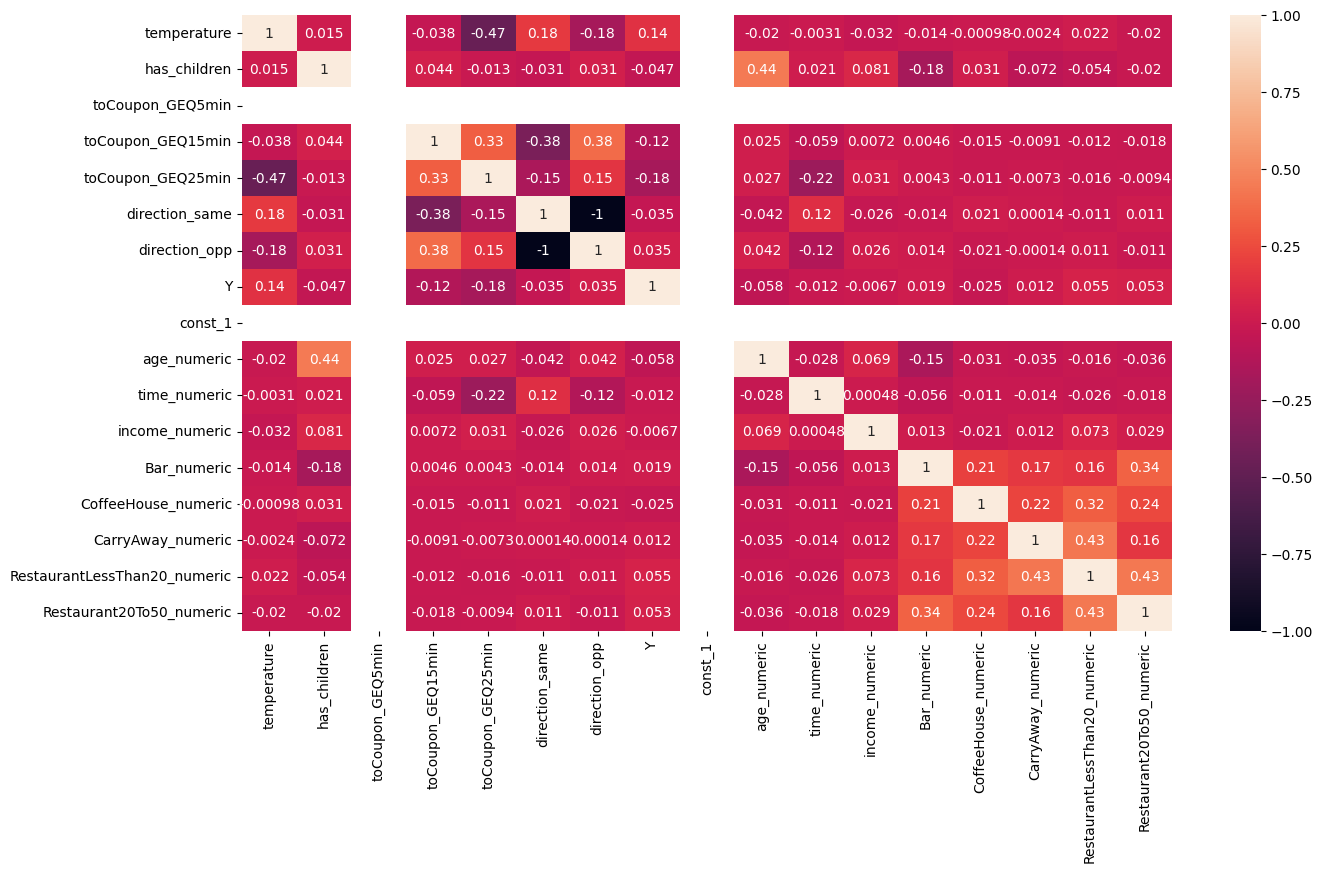

In [49]:
# First pass see if anything obvious stands out
numericFieldDf = experimentDf.loc[:,NUMERIC_COLUMNS]
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(numericFieldDf.corr(), annot=True)

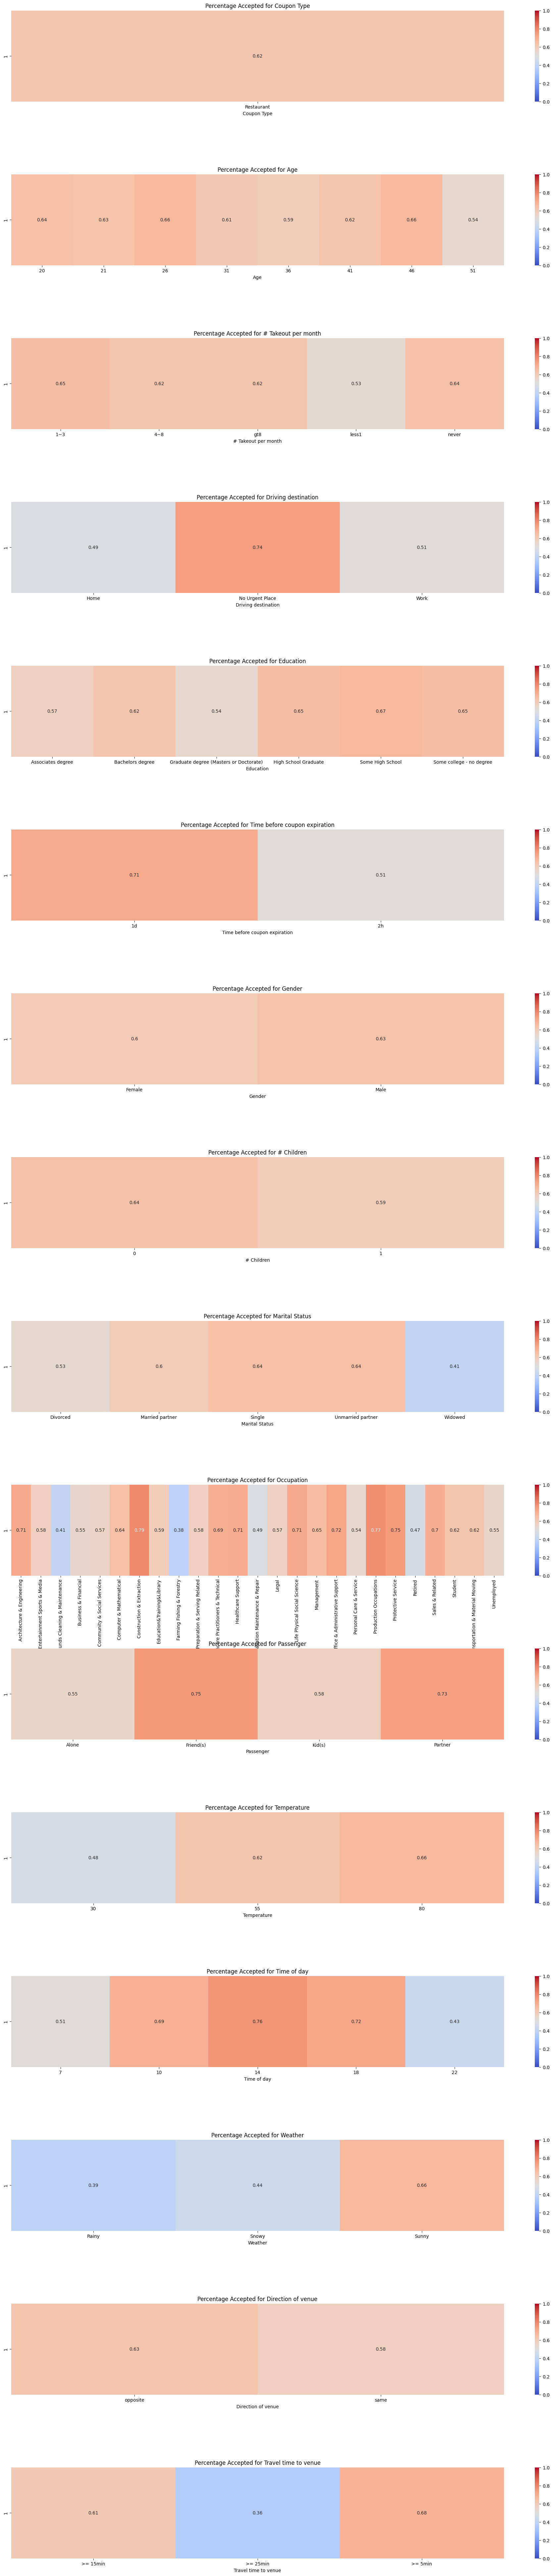

In [50]:
pairs2Try = []
# Single dimension - Find interesting ones and pair up
singleDimensions = ['coupon_normalized', 'age_numeric', 'CarryAway', 'destination', 'education', 'expiration', 'gender', 'has_children', 'maritalStatus', 'occupation', 'passanger', 'temperature', 'time_numeric', 'weather', 'venue_direction', 'venue_travel_time']
for k in singleDimensions:
    pairs2Try.append(['const_1', k])

plotHeatMapPair(experimentDf, pairs2Try, './images/restaurant_heatmap_single_dimensions.png')

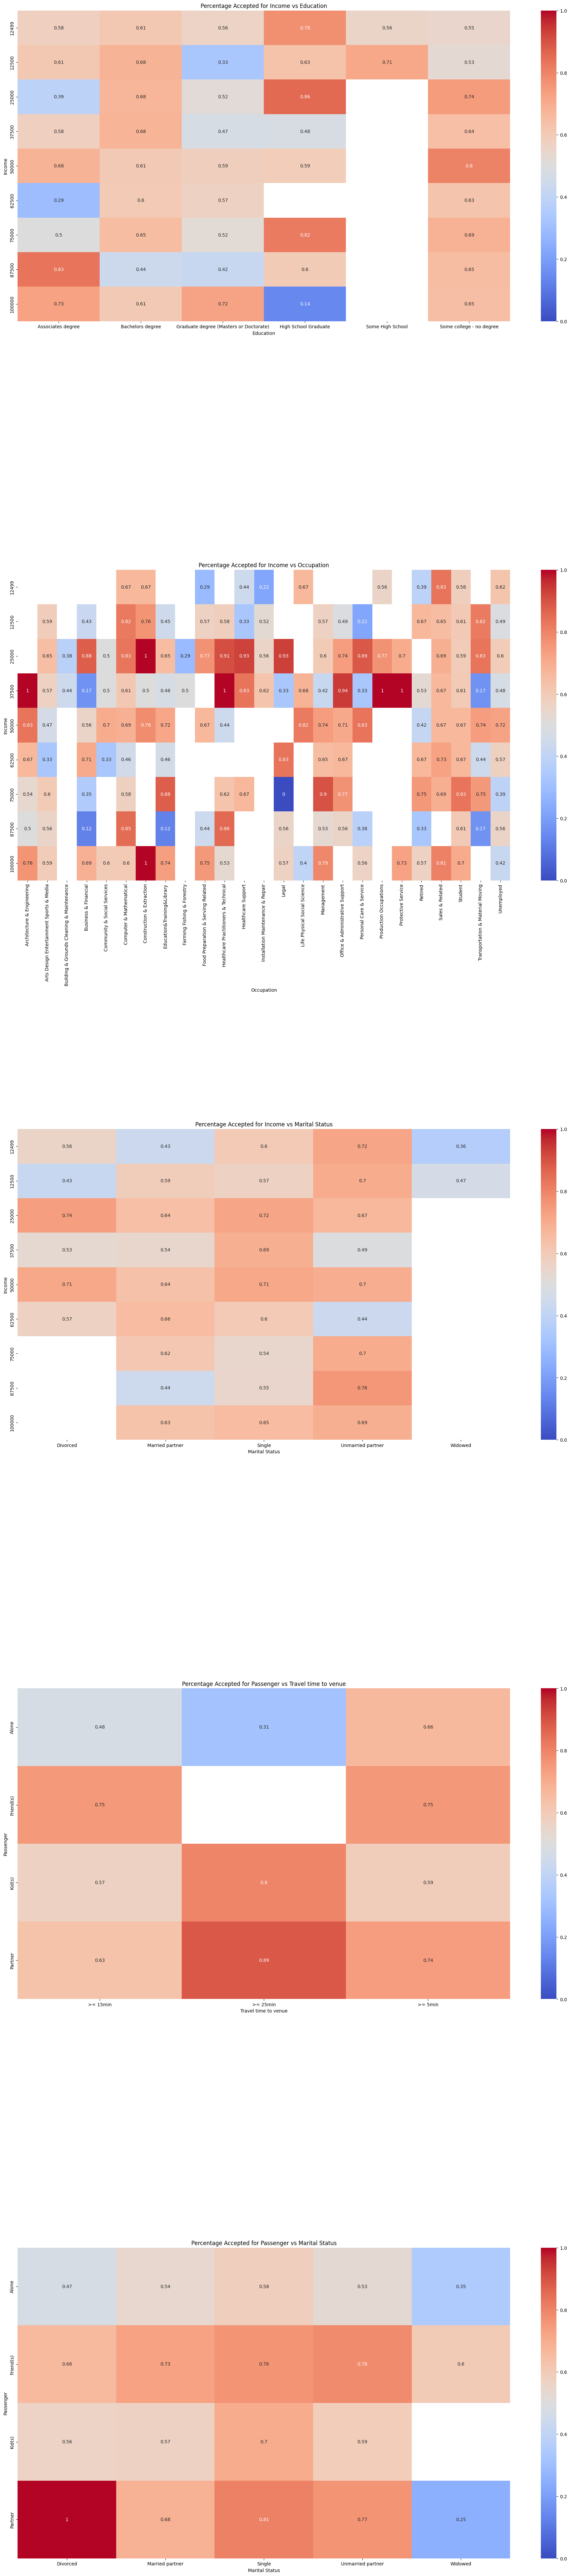

In [51]:
pairs2Try = []

# Dual dimension
pairs2Try.append(['income_numeric', 'education'])
pairs2Try.append(['income_numeric', 'occupation'])
pairs2Try.append(['income_numeric', 'maritalStatus'])
pairs2Try.append(['passanger', 'venue_travel_time'])
pairs2Try.append(['passanger', 'maritalStatus'])

plotHeatMapPair(experimentDf, pairs2Try, './images/restaurant_heatmap_dual_dimensions.png')

## Findings

### Overall
The acceptance rate for restaurant coupons was 62% across the data

### Analysis along single dimension
Results: <img src="./analysis/images/heatmap_single_dimensions.png" width="200"/>
<ul>
    <li>Looking at the acceptance rate for restaurant coupons across only one dimension at a time we find the following features have noticeable impact on acceptance rates (NOTE: I am looking at acceptance rates where the rate > 65% OR large difference in bucket values):
        <ul>
            <li>Driving destination in ['No Urgent Place'] = 74%</li>
            <li>When the driver has passengers that are not kids approximately 70+% acceptance rate</li>
            <li>Coupon expiration of 1 day has approximately 71% acceptance rate</li>
            <li>Time of day between 10 a.m. and 6 p.m. has approximately 70% acceptance rate</li>
            <li>Venue distance < 25 minutes approximately 64% acceptance rate</li>
            <li>Weather is sunny has approximately 66% acceptance rate</li>
        </ul>
    </li>
</ul>
                
### Analysis along dual dimensions
Results: <img src="./analysis/images/heatmap_dual_dimensions.png" width="200"/>
<ul>
    <li>Education and Occupation seems to affect acceptance rate</li>
    <li>Combining multiple features from above we see:
        <ul>
            <li>Passenger vs Travel Time: If someone is in the car that is not a kid and travel time < 25 minutes people are more likley to accept the coupon typically > 60%. However if kids or a parter are in the car the driver is more willing to drive longer (80+%)</li>
            <li>Passanger vs Marital Status: Generally seems like lower acceptance rates here when the person is travelling alone or is widowed</li>
        </ul>
    </li>
</ul> 

### Bucket based analysis
Using the information gleaned above we will experiment with bucketing across multiple feature conditions.
<table>
    <tr>
        <th>Condition</th>
        <th>Analysis Result</th>
        <th>Acceptance Rate</th>
        <th>Notes</th>
    </tr>
    <tr>
        <td>Drivers who are travelling with at least one passenger</td>
        <td><img src="./analysis/images/condition1.png" width="200"/></td>
        <td>70.36%</td>
    </tr>
    <tr>
        <td>Drivers who are travelling with at least one passenger and coupon expiration is 1 day</td>
        <td><img src="./analysis/images/condition2.png" width="200"/></td>
        <td>78.83%</td>
    </tr>
    <tr>
        <td>Drivers who earn over 25k and are in travelling based occupations and students and travel time < 15 min</td>
        <td><img src="./analysis/images/condition3.png" width="200"/></td>
        <td>72.76</td>
    </tr>
    <tr>
        <td>Drivers who are single travelling with at least one passenger (not a kid) and income between $30k - $50k between 10 a.m. and 6 p.m.</td>
        <td><img src="./analysis/images/condition4.png" width="200"/></td>
        <td>92.31%</td>
        <td>Very few data points (9) so not so reliable</td>
    </tr>
</table>

### Actionable items
- Best course of action is to target passengers who are travelling with someone prefer those without kids as passengers
- Make sure the coupon is 1 day
- Prefer to send coupons to drivers that are less than 15 minutes away from venue
- Target drivers within the time range of 10 a.m. to 6 p.m.
- Prefer those with income > $25K

### Next steps
- See if we can qualify blue collar occupations vs not and see if that has an impact
- See if we can qualify travel based jobs vs not and see if that has an impact
- Need more granular times to see if we can get better targeting
- If there is a way to establish if the person is just driving around that would be great input to drive coupon acceptance

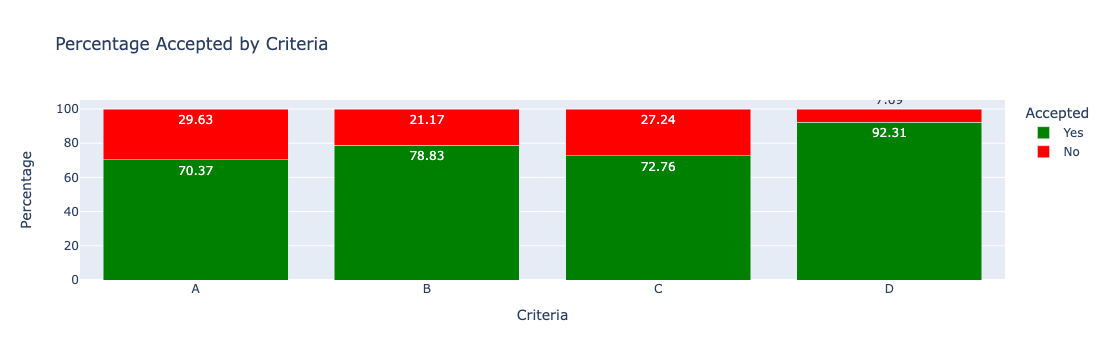

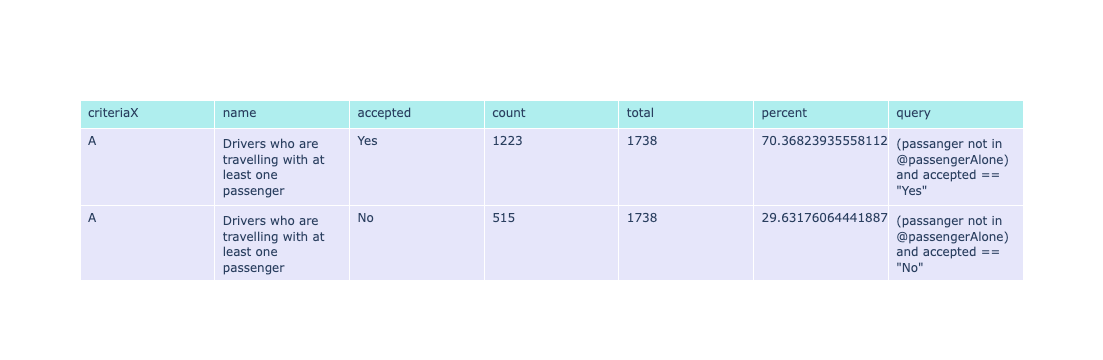

In [53]:
        

conditions = []
passengerAlone = ['Alone']
venueTravelTime = ['>= 25min', '>= 15min']
occupations = ['Student', 'Sales & Related', 'Construction & Extraction', 'Installation Maintenance & Repair', 
    'Building & Grounds Cleaning & Maintenance', 'Transportation & Material Moving', 'Protective Service']

condition1 = {
    'name': 'Drivers who are travelling with at least one passenger',
    'condition': 'passanger not in @passengerAlone',
    'xAxisDisplay': 'A',
    'fileName': './images/condition1.png'
}
condition2 = {
    'name': 'Drivers who are travelling with at least one passenger and coupon expiration is 1 day',
    'condition': 'passanger not in @passengerAlone and expiration == "1d"',
    'xAxisDisplay': 'B'
}
condition3 = {
    'name': 'Drivers who earn over 25k and are in travelling based occupations and students and travel time < 15 min',
    'condition': 'occupation in @occupations and income_numeric > 25000 and venue_travel_time not in @venueTravelTime',
    'xAxisDisplay': 'C'
}
condition4MaritalStatus = ['Single']
condition4Passenger = ['Friend(s)', 'Partner']
condition4VenueTravelTime = ['>= 5min']
condition4 = {
    'name': 'See Notes',
    'condition': 'maritalStatus in @condition4MaritalStatus and passanger in @condition4Passenger and income_numeric > 30000 and income_numeric < 50000 and time_numeric >= 10 and time_numeric <= 18 and venue_travel_time in @condition4VenueTravelTime',
    'xAxisDisplay': 'D'
    
}


conditions.append(condition1)
conditions.append(condition2)
conditions.append(condition3)
conditions.append(condition4)
params = {'debug': debugOn}
generateAcceptanceRateBarReport4Criteria(params, experimentDf, conditions, './images/restaurant_bar.png')
